# Digit Recognizer - SVM Assignment

Problem Statement

A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

## Data Understanding 

In [1]:
### Import all required libraries 

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
### Reas Train data set
digits = pd.read_csv(r"\Assignment\digit-recognizer\train.csv")

In [3]:
### Inspect the data 

# dimensions
print("Dimensions: ", digits.shape, "\n")

# data types
print(digits.info())

# head
digits.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
### Check for null values

digits.isnull().any().unique()
### No null values seen

array([False])

In [29]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Data Preparation

In [4]:
# splitting train data into X and y
X = digits.drop("label", axis = 1)
y = digits['label']

In [5]:
# scaling the features
X_scaled = scale(X)

# train test split
### Using stratifiedShuffleSplit to ensure there is no imbalance in test , train split.
### 70% of data used for model test.

stratifiedcv = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

## Create the train and test data based on index generated by Stratfied cv
for train_index, test_index in stratifiedcv.split(X_scaled,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


TRAIN: [38243 34756  6426 ... 34771 12529 41498] TEST: [38318 23833 34732 ... 28607 29799 38258]
TRAIN: [ 9449 34701  5227 ...  3823 30014  5823] TEST: [20286 23039 26794 ... 36357  2014 12010]
TRAIN: [26838 31126 30534 ... 13469 41843  2895] TEST: [24060 28095  6748 ...  8416  1283 12187]
TRAIN: [19740 15022 16449 ... 15274 20807 33337] TEST: [32916 32491   958 ... 23872 16239 40214]
TRAIN: [25386 37010 32744 ... 41938 26072  9436] TEST: [ 5021 37404 32489 ... 38552  2475   972]
TRAIN: [41598 19352 38881 ...  1413 25494 34163] TEST: [  764 25246 14917 ... 38274 30781 30977]
TRAIN: [16923 29832 15113 ... 26436 18977 29998] TEST: [29252 18695 37897 ... 10186 31986 22293]
TRAIN: [34894 30048 33677 ... 32638 19061 17515] TEST: [ 7402 14207 22906 ... 27289 15096 32145]
TRAIN: [ 7423 15666 18258 ... 16329 20322 17831] TEST: [13975 13103 24523 ... 14554  8499 27666]
TRAIN: [31662 10862 19302 ... 11010 40862 12120] TEST: [20449 31769 41492 ... 35275  6934  5968]


In [6]:
### Get the value of test , train data 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400,)
(12600,)


## Model Building


In [39]:
# Build a linear model first and valdiate if suitable for the dataset

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [40]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


accuracy: 0.915079365079365 

[[1204    0    0    3    4   10   11    0    6    2]
 [   0 1386    4    2    1    0    0    2    7    3]
 [  14   17 1120   31   14    8   11   13   24    1]
 [   4    6   41 1147    2   62    2    4   29    8]
 [   3    4   16    6 1140    2    9    4    1   37]
 [  22    8    9   38   11 1000   16    0   24   11]
 [  10    1   17    1   12   19 1178    0    3    0]
 [   3    5   15    4   23    2    0 1230    3   35]
 [  12   32   16   49    8   34    6    9 1035   18]
 [   3    6   10   22   59   11    0   47    8 1090]]


#### Linear Model : Accuracy :91%.
Accuracy is used as the prefered metric for model evaluation 

In [41]:
#### Build Non-Linear model and evaluate

# using rbf kernel, C=1, default value of gamma
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

C:\Users\vinodhini_v\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9592857142857143 

[[1215    0    2    0    4    2    8    2    7    0]
 [   0 1387    5    4    1    1    1    4    2    0]
 [   5    2 1194    9    8    2    7   17    7    2]
 [   0    3   17 1240    1   12    1   10   15    6]
 [   2    2   10    0 1169    1    4    5    3   26]
 [   7    4    3   13    3 1080   11    9    6    3]
 [   1    0    3    0    1   12 1213    8    3    0]
 [   1    6    7    3   10    0    1 1272    1   19]
 [   5    9    9   15    6   10    4   10 1144    7]
 [   2    4    4   12   20    6    1   29    5 1173]]


#### Linear Model : Accuracy :95.9%.
Accuracy is used as the prefered metric for model evaluation 

Non-linear model prefered for this data-set.

### Grid Search: Hyperparameter Tuning for Non-Linear Model

In [11]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# setting the range of hyperparameters
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        n_jobs=3,
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 245.9min
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed: 333.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [13]:
# Get the CV results for plotting to understand the impact of hyperparameters
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1262.198696,28.158607,126.299208,3.618123,1,0.01,"{'C': 1, 'gamma': 0.01}",0.817007,0.808844,0.812245,...,0.811565,0.003355,12,0.999830,0.999702,0.999745,0.999660,0.999617,0.999711,0.000073
1,202.733226,6.251344,58.305422,6.676111,1,0.001,"{'C': 1, 'gamma': 0.001}",0.947789,0.953741,0.952721,...,0.952143,0.002242,4,0.977806,0.977636,0.977806,0.977338,0.977338,0.977585,0.000211
2,304.977521,19.082106,86.735882,7.779858,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.923639,0.928061,0.920238,...,0.924388,0.002710,8,0.933291,0.932228,0.931803,0.931165,0.930357,0.931769,0.000989
3,1400.844782,67.996491,138.518065,7.460502,10,0.01,"{'C': 10, 'gamma': 0.01}",0.828571,0.822619,0.827381,...,0.825204,0.002465,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,178.628003,8.518929,49.358227,4.953173,10,0.001,"{'C': 10, 'gamma': 0.001}",0.959014,0.962755,0.962755,...,0.962245,0.001680,1,0.998554,0.999150,0.998639,0.998469,0.998384,0.998639,0.000269
5,145.340920,14.883191,53.665507,7.315203,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.939116,0.941497,0.938776,...,0.940714,0.001786,7,0.962798,0.961692,0.961054,0.960247,0.960502,0.961259,0.000916
6,1307.592791,12.407630,145.522659,13.665109,100,0.01,"{'C': 100, 'gamma': 0.01}",0.828571,0.822619,0.827381,...,0.825204,0.002465,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,185.560495,12.045840,58.261139,6.759757,100,0.001,"{'C': 100, 'gamma': 0.001}",0.958333,0.963265,0.962585,...,0.961803,0.001815,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,105.682262,1.955760,39.410435,1.213447,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.943537,0.945748,0.944048,...,0.947075,0.003311,5,0.987968,0.988605,0.988563,0.987628,0.987798,0.988112,0.000400
9,1629.364947,469.070339,131.590081,13.426180,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.828571,0.822619,0.827381,...,0.825204,0.002465,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


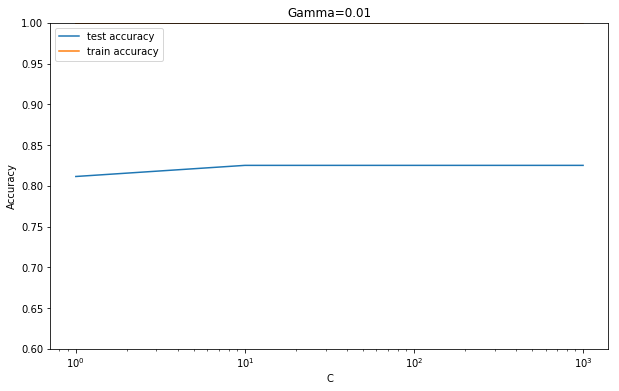

In [14]:
#### Plotting of CV results 

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(10,6))

gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



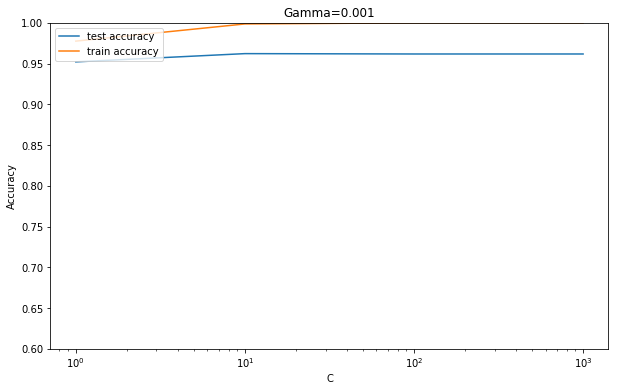

In [16]:
plt.figure(figsize=(10,6))
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')




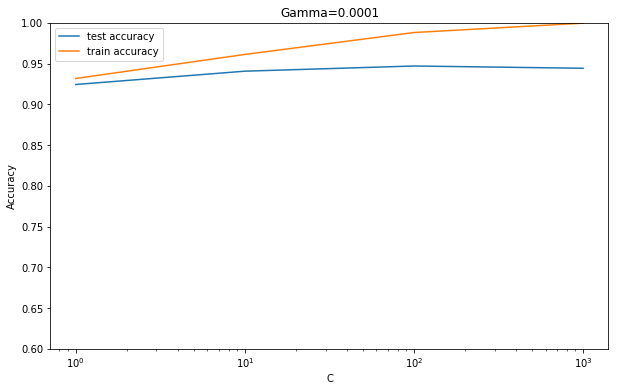

In [17]:
plt.figure(figsize=(10,6))
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [18]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9622448979591837 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


#### Optimal Gamma is 0.001 & C is 10.

### Building and Evaluating the Final Model

In [19]:
# model with optimal hyperparameters

model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.9669047619047619 

[[1218    0    2    1    2    2    8    2    3    2]
 [   0 1388    7    2    1    0    0    4    3    0]
 [   5    1 1199    9    3    0    7   17    9    3]
 [   0    1   10 1262    1   12    1    5   10    3]
 [   2    3   12    1 1174    1    3    2    3   21]
 [   6    4    3    8    4 1093    5    5    6    5]
 [   2    0    2    0    1    7 1221    6    2    0]
 [   2    4    5    2   11    0    0 1278    2   16]
 [   8    6    6   16    7    7    1    4 1159    5]
 [   3    1    3    8   15    6    0   25    4 1191]] 



#### Test data accuracy is 96.6%

### New Prediction

In [20]:
## Data for prediction
test_data=pd.read_csv(r"D:\OneDrive - Infosys Limited\UG\PredictiveAnalyticsII\SVM\Assignment\digit-recognizer\test.csv")

In [21]:
test_data.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test_data.shape
### Expected number of columns present

(28000, 784)

In [26]:
test_data.isnull().any().unique()
### no null values seen.

array([False])

In [30]:
test_scaled = scale(test_data)
test_pred = model.predict(test_scaled)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [31]:
### Inspecting the predicted data labels
np.unique(test_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [38]:
file_name=r"D:\OneDrive - Infosys Limited\UG\PredictiveAnalyticsII\SVM\Assignment\digit-recognizer\test_prediction.csv"
test_pred_df=pd.DataFrame(test_pred, columns=['Label'])
                                           
test_pred_df.to_csv(file_name)